# Basic example of BiLRP on SBERT with Mean Pooling

Model link: [sentence-transformers/stsb-bert-base](https://huggingface.co/sentence-transformers/stsb-bert-base)

In [1]:
%load_ext autoreload
%autoreload 2

import configs
from src.utils.helper import format_tokenizer_outs_xai
from src.models.model_facade import ModelFacade
from src.utils.helper_plots import plot_bilrp_sentences

In [2]:
# PARAMS
pooling = "MEAN_POOLING"

# Choose model
# model='bert-base-uncased'
model = 'sentence-transformers/stsb-bert-base'
lrp = True
reset_biases = False  # Use to proof-check the conservation property
print(f"Device identified: {configs.device}")

Device identified: cpu


In [3]:
# Instantiate the model and tokenizer
model_facade = ModelFacade(
    pooling=pooling,
    model_name=model,
    lrp=lrp,
    reset_biases=reset_biases
)
sim_model = model_facade.sim_model
tokenizer = model_facade.tokenizer


In [4]:
text = ["A man is playing the guitar.",
        "A woman is playing the guitar."] # STSb train split, row 31

stsb_sample_score = 4.909 / 5

encoded_input1 = tokenizer(text[0], return_tensors='pt')
encoded_input2 = tokenizer(text[1], return_tensors='pt')

encoded_input_united = format_tokenizer_outs_xai(encoded_input1,
                                                 encoded_input2)

outputs = sim_model.forward_explain(**encoded_input_united)

decoded1 = tokenizer.convert_ids_to_tokens(
    encoded_input1['input_ids'].numpy().squeeze())
decoded2 = tokenizer.convert_ids_to_tokens(
    encoded_input2['input_ids'].numpy().squeeze())


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:25<00:00, 42.94s/it]


## Plots

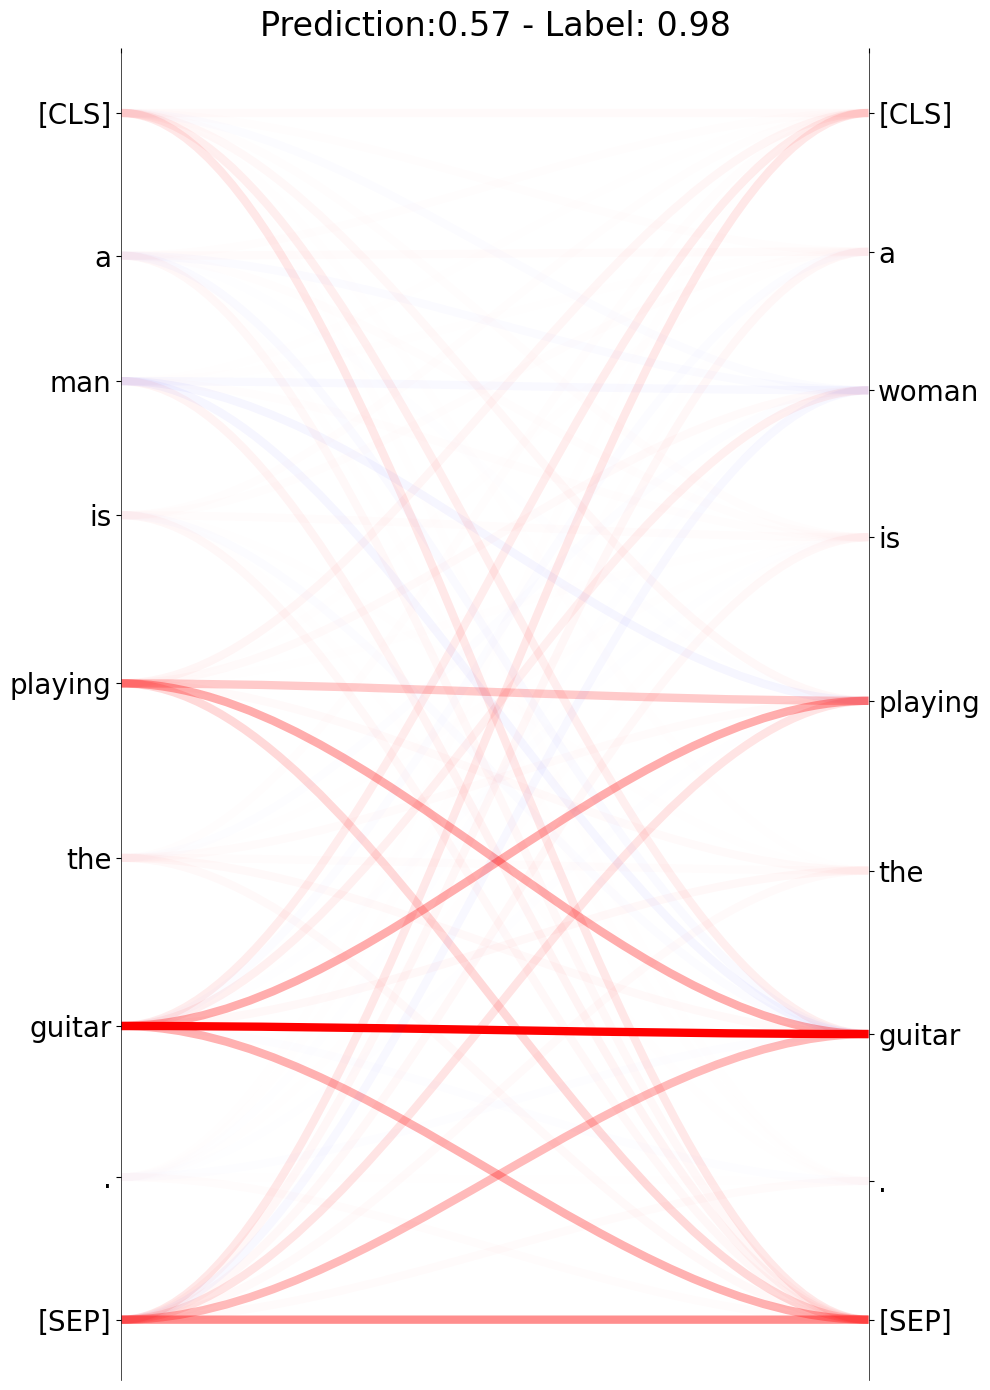

In [5]:
plot_bilrp_sentences(decoded=[decoded1, decoded2],
                    outs=[{"Rsen": outputs["Rsen"][0]},
                     {"Rsen": outputs["Rsen"][1]}],
                    relevance_scores=outputs["relevance_scores"],
                    title=f'Prediction:{outputs["similarity_scores"].item():0.2f} - Label: {stsb_sample_score:0.2f}',
                                )